<a href="https://colab.research.google.com/github/AlfaroDev/NLP-Entrega-final-Grupo-8/blob/main/Entregable_Actividad_2_Clasificacion_Noticias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 2: Clasificaci√≥n de Noticias Usando RNNs y LSTMs

### Prop√≥sito de Aprendizaje
Adquirir habilidades pr√°cticas en el preprocesamiento de datos textuales y en la implementaci√≥n de modelos avanzados de RNN y LSTM para la clasificaci√≥n de noticias en categor√≠as especializadas como deportes, cultura, econom√≠a y justicia. Al finalizar, los estudiantes habr√°n desarrollado la capacidad de construir, entrenar y evaluar estos modelos, as√≠ como de comparar su rendimiento de manera cr√≠tica.

### Producto(s)
- **Cuaderno Jupyter (Jupyter Notebook):** Documentar el proceso completo de preprocesamiento, construcci√≥n, entrenamiento, evaluaci√≥n y comparaci√≥n de modelos RNN y LSTM.
- **Informe (PDF/Markdown):** Un documento que resuma los hallazgos, compare los modelos RNN y LSTM, y discuta las implicaciones pr√°cticas de los resultados.


### Ejercicio 1: Carga y Exploraci√≥n de Datos
**Objetivo:** Familiarizarse con el conjunto de datos y comprender la distribuci√≥n de las categor√≠as.

**Acciones:**
- Cargar el archivo `Noticias.xlsx` que contiene las noticias.
- Explorar la distribuci√≥n de la columna `Etiqueta` para ver cu√°ntas noticias pertenecen a cada categor√≠a.
- Visualizar esta distribuci√≥n mediante gr√°ficos para identificar las categor√≠as m√°s frecuentes.

**Contexto:** La columna `Etiqueta` en el conjunto de datos contiene varias categor√≠as, algunas de las cuales no son especializadas o no contienen un enfoque espec√≠fico (por ejemplo, "archivo"). Para esta actividad, nos centraremos en noticias de las categor√≠as especializadas: deportes, cultura, econom√≠a y justicia. Estas categor√≠as son relevantes porque representan temas con un enfoque claro y espec√≠fico, lo que hace que la clasificaci√≥n sea m√°s √∫til y aplicable en el an√°lisis de noticias.


In [ ]:
# prompt: Clonar reposito de github del proyecto

!git clone https://github.com/czambranobetancourt/nlp_ean.git

Cloning into 'nlp_ean'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 188 (delta 28), reused 21 (delta 21), pack-reused 151 (from 1)
Receiving objects: 100% (188/188), 223.60 MiB | 19.57 MiB/s, done.
Resolving deltas: 100% (70/70), done.
Updating files: 100% (31/31), done.


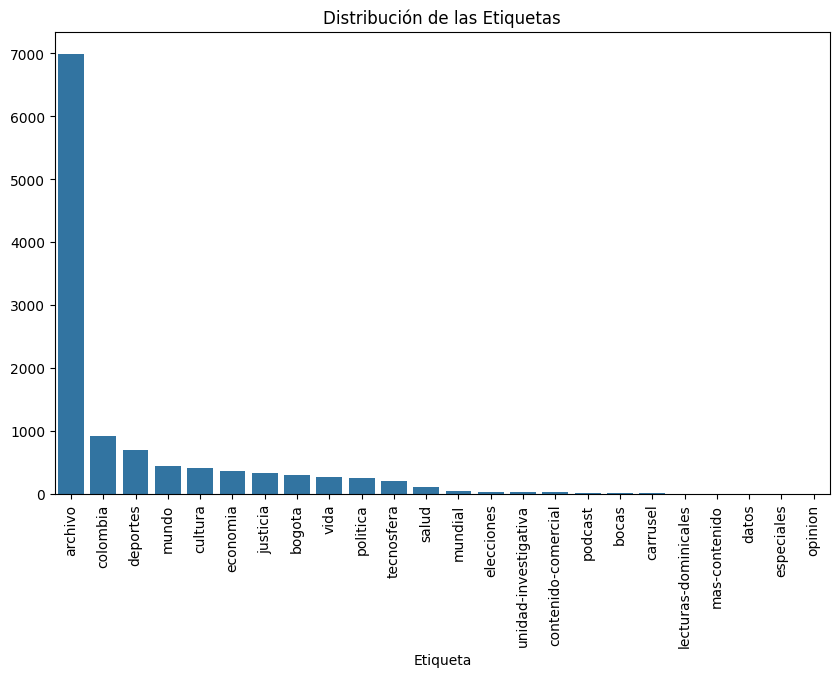

In [ ]:
# Cargar bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
file_path = '/content/nlp_ean/Datos/Datos Crudos/Noticias.xlsx'
data = pd.read_excel(file_path)

## Quitamos los nulos
data = data.dropna()

# Mostrar las primeras filas del conjunto de datos
data.head()

# Visualizar la distribuci√≥n de las etiquetas
plt.figure(figsize=(10, 6))
#sns.countplot(data['Etiqueta'])
s = data['Etiqueta'].value_counts()
s = data['Etiqueta'].value_counts().rename_axis('Etiqueta').rename('count')
sns.barplot(x=s.index, y=s.values, order=s.index)
plt.title('Distribuci√≥n de las Etiquetas')
plt.xticks(rotation=90)
plt.show()

### Ejercicio 2: Filtrado de Datos
**Objetivo:** Limitar el conjunto de datos a las categor√≠as relevantes para garantizar que el modelo se entrene y eval√∫e en temas especializados.

**Acciones:**
- Excluir las noticias que pertenecen a la categor√≠a "archivo" y cualquier otra que no est√© en las categor√≠as de deportes, cultura, econom√≠a y justicia.
- Asegurarse de que el conjunto de datos resultante tenga una distribuci√≥n equilibrada para estas categor√≠as, en la medida de lo posible.


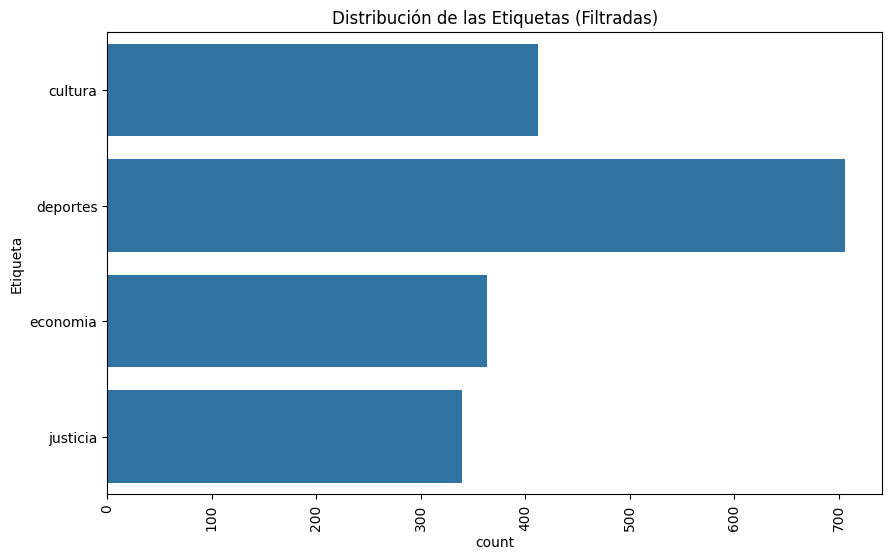

In [ ]:
# Filtrar las categor√≠as relevantes y excluir "archivo"
categorias_relevantes = ['deportes', 'cultura', 'economia', 'justicia']
data_filtrada = data[data['Etiqueta'].isin(categorias_relevantes)]

# Visualizar la distribuci√≥n de las etiquetas despu√©s del filtrado
plt.figure(figsize=(10, 6))
sns.countplot(data_filtrada['Etiqueta'])
plt.title('Distribuci√≥n de las Etiquetas (Filtradas)')
plt.xticks(rotation=90)
plt.show()



### Ejercicio 3: Preprocesamiento de Texto
**Objetivo:** Preparar los datos textuales para el entrenamiento del modelo.

**Acciones:**
- Convertir todo el texto a min√∫sculas para uniformidad.
- Eliminar puntuaci√≥n y n√∫meros para reducir el ruido en los datos.
- Eliminar palabras comunes (stop words) que no aportan significado espec√≠fico al an√°lisis.
- Tokenizar el texto, es decir, dividir el texto en palabras individuales.


Para este ejercicio debe instalarse la libreria keras y tensorflow, para ello se debe ejecutar el siguiente comando en la consola de anaconda:
```python
pip install keras tensorflow
```

In [ ]:
!pip install keras_nlp

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 691.2/691.2 kB 14.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5.2/5.2 MB 64.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 615.3/615.3 MB 3.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5.5/5.5 MB 5.4 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's depende

In [ ]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import keras_nlp
import tensorflow as tf
import re
# Descargar recursos de NLTK
#nltk.download('punkt')
nltk.download('punkt_tab')
#nltk.download('stopwords')


# Funci√≥n de preprocesamiento
def preprocess_text(text):
  #text = text.lower()
  #text = ''.join([c for c in text if c not in string.punctuation and not c.isdigit()])
  oracion_a_eliminar = "Miedo 11:19 p.m. Ejercite su mente en la cuarentena con este test de l√≥gica matem√°tica Ponga a prueba esas clases de matem√°ticas del colegio y de la vida par ... Manizales 10:00 p.m. Ya se venden medicamentos de cannabis con f√≥rmula m√©dica En farmacias especializadas de Colombia es posible acceder a medicamen ... Manizales 10:00 p.m. El gu√≠a de la salud mental del pueblo con m√°s casos de bipolaridad Coronavirus en Colombia 09:31 p.m. Una cabina de desinfecci√≥n manual para Barranquilla Valle del Cauca 07:50 p.m. Se han recogido cerca de 132 mil mercados en 'Donat√≥n Valle Solidario'"
  #oracion_a_eliminar = re.escape(oracion_a_eliminar)
  nuevo_texto = re.sub(oracion_a_eliminar, '', text)
  nuevo_texto = re.sub("\\s+", ' ', nuevo_texto) #Eliminaci√≥n de espacios en blanco m√∫ltiples
  nuevo_texto = re.sub("p\.m|p\. m", 'pm', nuevo_texto) #ajustar pm
  nuevo_texto = re.sub("a\.m|a\. m", 'am', nuevo_texto) #ajustar am
  nuevo_texto = re.sub("No\.\s(?=[0-9])", 'No ', nuevo_texto) #ajustar ajustar nomenclatura de actas
  nuevo_texto = re.sub("vs." , 'vs', nuevo_texto) #elimina las horas
  nuevo_texto = re.sub("\d+\:\d+\sa\.m" , ' ', nuevo_texto) #elimina las horas
  nuevo_texto = re.sub(r"(?<=\.)[^.]*$", "", nuevo_texto, 1, re.DOTALL)
  nuevo_texto = re.sub("\\s+", ' ', nuevo_texto) #Eliminaci√≥n de espacios en blanco m√∫ltiples
  nuevo_texto = re.sub("[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}" , ' ', nuevo_texto) #Eliminaci√≥n de correos electr√≥nicos
  nuevo_texto = re.sub("[#|@](\w+)" , ' ', nuevo_texto) #Eliminaci√≥n de etiquetas de tweets, instagram y facebook
  nuevo_texto = re.sub('https\S+', ' ', nuevo_texto) # Eliminaci√≥n de p√°ginas web (palabras que empiezan por "http")
  nuevo_texto = re.sub('www\S+', ' ', nuevo_texto) # Eliminaci√≥n de p√°ginas web (palabras que empiezan por "www")
  nuevo_texto = re.sub("\\s+", ' ', nuevo_texto) #Eliminaci√≥n de espacios en blanco m√∫ltiples
  re.sub(r"(?<!www\.)([\w-]+\.(?!\d+)[\w-]+)", ' ', nuevo_texto) #Eliminaci√≥n de paginas web que no comienzan con wwww
  regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\-\\/\\<\\=\\>\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~\\‚Äú\\‚Äù\\‚Äì\\‚Äò\\‚Äô\\¬°\\¬¥\\¬™\\‚Äî\\¬¥\\¬£\\¬´\\¬ª\\¬©\\¬Æ\\¬∞\\¬∑\\‚Ä¶\\‚Ä¢\\¬º\\¬Ω\\¬™]'
  nuevo_texto = re.sub(regex , ' ', nuevo_texto)
  nuevo_texto = re.sub("\\s+", ' ', nuevo_texto) #Eliminaci√≥n de espacios en blanco m√∫ltiples
  # Define la oraci√≥n que quieres eliminar

  tokens = re.split(r"\.\s(?=[A-Z0-9])|\.\:|\¬ø|\?", nuevo_texto)
  regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\;\\<\\:\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~\\‚Äú\\‚Äù\\‚Äì\\‚Äò\\‚Äô\\¬ø\\¬°\\¬¥\\¬™\\‚Äî\\¬¥\\¬£\\¬´\\¬ª\\¬©\\¬Æ\\¬∞\\¬∑\\‚Ä¶\\‚Ä¢\\¬º\\¬Ω\\¬™]'
  tokens = [re.sub(regex , '', token) for token in tokens]
  tokens = [re.sub("\\s+", ' ', token) for token in tokens]
  #patron_hora = r'\d{1,2}:\d{2}(:\d{2})?'
  #tokens = [re.sub(r'(?:\d{1,2}:\d{2}(?::\d{2})?)?(:)(?!\d)', r'\1', token) for token in tokens]
  tokens = [token.strip() for token in tokens]
  tokens = [token for token in tokens if len(token) != 0 and token != " "]
  #regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~\\‚Äú\\‚Äù\\‚Äì\\‚Äò\\‚Äô\\¬ø\\¬°\\¬¥\\¬™\\‚Äî\\¬¥\\¬£\\¬´\\¬ª\\¬©\\¬Æ\\¬∞\\¬∑\\‚Ä¶\\‚Ä¢\\¬º\\¬Ω\\¬™]'
  #nuevo_texto = re.sub(regex , ' ', nuevo_texto)
  #nuevo_texto = re.sub("\d+", ' ', nuevo_texto) #Eliminaci√≥n de numeros
  #nuevo_texto = re.sub("\\s+", ' ', nuevo_texto) #Eliminaci√≥n de espacios en blanco m√∫ltiples
  #tokens = word_tokenize(nuevo_texto)
  #tokens = [word for word in tokens if word not in stopwords.words('spanish')]
  #return ' '.join(nuevo_texto)
  return tokens

# Aplicar preprocesamiento
data_filtrada['contenido_preprocesado'] = data_filtrada['contenido'].apply(preprocess_text)



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
<ipython-input-5-bf48012ff364>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrada['contenido_preprocesado'] = data_filtrada['contenido'].apply(preprocess_text)


In [ ]:
data_filtrada = data_filtrada[['contenido_preprocesado', 'Etiqueta']]
data_filtrada_new = data_filtrada.explode('contenido_preprocesado')
data_filtrada.head()

contenido_preprocesado Etiqueta
10487  [Citas Los cr√≠menes de violencia sexual cometi...  cultura
10488  [Con motivo de la celebraci√≥n de los 20 a√±os d...  cultura
10489  [El cuadro Busto de mujer del artista espa√±ol ...  cultura
10490  [El Carnaval de las Artes organizado en Barran...  cultura
10491  [Louise du Toit fil√≥sofa el doctor Denis Mukwe...  cultura

In [ ]:
data_filtrada_new.head()

contenido_preprocesado Etiqueta
10487  Citas Los cr√≠menes de violencia sexual cometid...  cultura
10487  Tres casos en los que al interior de no es otr...  cultura
10487  Se trata de un galicismo introducido al pa√≠s p...  cultura
10487  Al interior de es v√°lido solo con verbos de mo...  cultura
10487  N√≥tese c√≥mo este al interior de es necesario p...  cultura

In [ ]:
data_filtrada_new['palabras'] = data_filtrada_new['contenido_preprocesado'].apply(lambda x: len(x.split()))
data_filtrada_new.head()

contenido_preprocesado Etiqueta  palabras
10487  Citas Los cr√≠menes de violencia sexual cometid...  cultura        43
10487  Tres casos en los que al interior de no es otr...  cultura        36
10487  Se trata de un galicismo introducido al pa√≠s p...  cultura        14
10487  Al interior de es v√°lido solo con verbos de mo...  cultura        22
10487  N√≥tese c√≥mo este al interior de es necesario p...  cultura        17

In [ ]:
data_filtrada_new.to_csv('data_filtrada_new.csv', index=False)

In [ ]:
data_filtrada_new['palabras'].describe()

count    40077.000000
mean        23.993837
std         15.747215
min          1.000000
25%         12.000000
50%         21.000000
75%         33.000000
max        181.000000
Name: palabras, dtype: float64

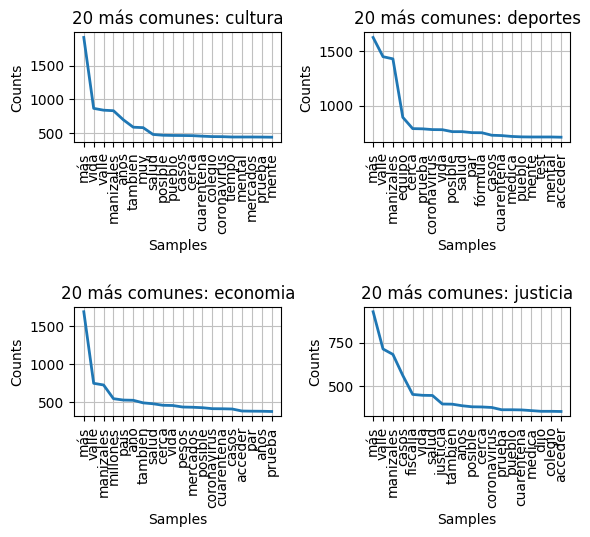

In [ ]:
plt.figure()

i = 1
for k, v in fdist.items():
    #fig.add_subplot(2,2,i)
    plt.subplot(2,2,i)
    plt.title('20 m√°s comunes: ' + k)
    v.plot(20)
    i= i+1
plt.tight_layout()
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1.5)
plt.show()

In [ ]:
# Tokenizar el texto

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizaci√≥n y padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_filtrada_new['contenido_preprocesado'])
sequences = tokenizer.texts_to_sequences(data_filtrada_new['contenido_preprocesado'])
word_index = tokenizer.word_index
max_len = 100
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Mostrar algunas secuencias preprocesadas
padded_sequences[:5]

## Tambi√©n puede usar las t√©cnicas de preprocesamiento de texto y de embedding que hicimos anteriormente




array([[ 5325,     8,  2691,     1,   393,   756,  4880,    20,  1205,
            1,    12,   117,  1631,     2,  4491,  8166,  8837,     4,
         1386,  9695,  1689,    94, 16466,    20,  1205,     1,  8838,
            5,  6241, 16467,   844,     1,   611,  1690, 12111,    20,
         1205,     1,    19,   158, 20486,     1,  2501,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [   76,   232,     5,     8,     4,    20,  1205,     1,    18,
           17,   200,  1142,     4,     3,  4676, 13885,   105, 12112,
            1,     2,  3081, 13886,     5,     5,    12,   11

### Ejercicio 4: Divisi√≥n del Conjunto de Datos
**Objetivo:** Crear conjuntos de datos de entrenamiento y validaci√≥n para evaluar el modelo.

**Acciones:**
- Dividir el conjunto de datos preprocesado en dos partes: uno para entrenar el modelo y otro para validarlo.
- Asegurarse de que la divisi√≥n sea aleatoria pero mantenga una proporci√≥n similar de las categor√≠as en ambos conjuntos.

In [ ]:
!pip install imbalanced-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


# Codificaci√≥n de etiquetas
label_encoder = LabelEncoder()
data_filtrada_new['Etiqueta_codificada'] = label_encoder.fit_transform(data_filtrada_new['Etiqueta'])

# Divisi√≥n del conjunto de datos
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, data_filtrada_new['Etiqueta_codificada'], test_size=0.2, random_state=42)

# ======================================= Balanceo =======================================================

oversampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = oversampler.fit_resample(X_train, y_train)

# Mostrar tama√±o de los conjuntos de datos
len(X_train), len(X_val)


(32061, 8016)

## Ejercicio 5: Construcci√≥n y Entrenamiento de Modelos RNN

**Objetivo:** Implementar un modelo de Red Neuronal Recurrente (RNN) para clasificar noticias en las categor√≠as especializadas.

**Acciones:**
- Construir un modelo RNN utilizando capas de Embedding, SimpleRNN y Dense.
- Compilar el modelo con una funci√≥n de p√©rdida adecuada y un optimizador.
- Entrenar el modelo con el conjunto de datos de entrenamiento y validar su rendimiento con el conjunto de datos de validaci√≥n.
- Evaluar el rendimiento del modelo en t√©rminos de precisi√≥n y p√©rdida.

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1002/1002 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 36s 31ms/step - accuracy: 0.3082 - loss: 1.3711 - val_accuracy: 0.3709 - val_loss: 1.3183 - learning_rate: 5.0000e-05
Epoch 2/20
1002/1002 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 31s 31ms/step - accuracy: 0.3897 - loss: 1.2843 - val_accuracy: 0.4409 - val_loss: 1.1948 - learning_rate: 5.0000e-05
Epoch 3/20
1002/1002 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 32s 21ms/step - accuracy: 0.5009 - loss: 1.0953 - val_accuracy: 0.4943 - val_loss: 1.0656 - learning_rate: 5.0000e-05
Epoch 4/20
1002/1002 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 40s 21ms/step - accuracy: 0.5927 - loss: 0.9256 - val_accuracy: 0.5309 - val_loss: 1.0022 - learning_rate: 5.0000e-05
Epoch 5/20
1002/1002 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 22s 22ms/step - accuracy: 0.6529 - loss: 0.7949 - val_accuracy: 0.5490 - val_loss: 0.9913 - learning_rate: 5.0000e-05
Epoch 6/20


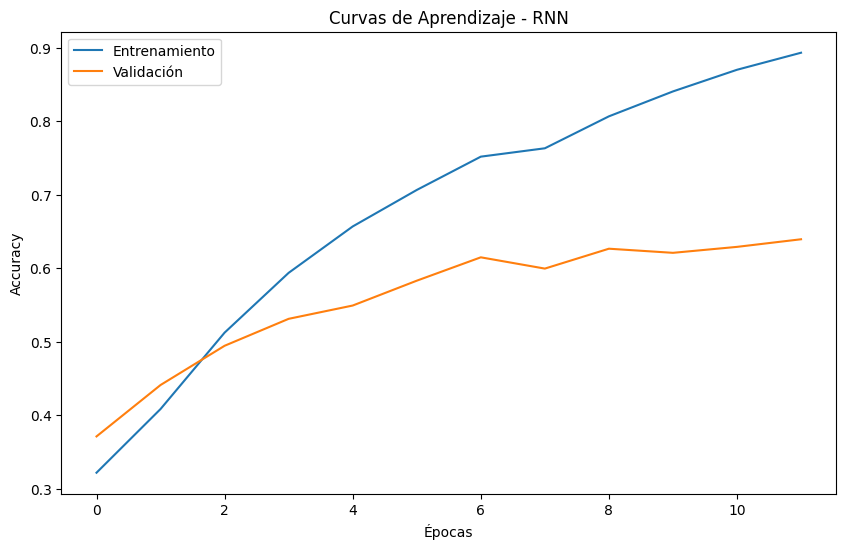

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout, Bidirectional
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2

"""
# Construcci√≥n del modelo RNN
# Haga cambios en la arquitectura del modelo para mejorar su rendimiento
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=len(word_index) + 1, output_dim=128, input_length=max_len))
#model_rnn.add(SimpleRNN(units=64, return_sequences=False))
model_rnn.add(Bidirectional(SimpleRNN(units=64, return_sequences=False)))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(units=len(categorias_relevantes), activation='softmax'))

# Compilaci√≥n del modelo
model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history_rnn = model_rnn.fit(X_train_smote, y_train_smote, validation_data=(X_val, y_val), epochs=10, batch_size=32)
"""
"""
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=len(word_index) + 1, output_dim=128, input_length=max_len))
model_rnn.add(Bidirectional(SimpleRNN(units=64, return_sequences=True)))  # Primera capa RNN
model_rnn.add(Dropout(0.5))
model_rnn.add(Bidirectional(SimpleRNN(units=64, return_sequences=False)))  # Segunda capa RNN
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(units=128, activation='relu'))  # Capa completamente conectada adicional
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(units=len(categorias_relevantes), activation='softmax'))"""

model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=len(word_index) + 1, output_dim=50, input_length=max_len))
#model_rnn.add(SimpleRNN(units=64, return_sequences=False))
model_rnn.add(Bidirectional(SimpleRNN(units=64, return_sequences=False)))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(units=len(categorias_relevantes), activation='softmax'))


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00005)
Optimizaer = tf.keras.optimizers.Adam(learning_rate=0.00005)
model_rnn.compile(optimizer=Optimizaer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_rnn = model_rnn.fit(X_train, y_train, validation_data=(X_val, y_val),
                            epochs=20, batch_size=32, callbacks=[early_stopping, reduce_lr])

# Visualizaci√≥n de resultados del modelo RNN
plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history['accuracy'], label='Entrenamiento')
plt.plot(history_rnn.history['val_accuracy'], label='Validaci√≥n')
plt.xlabel('√âpocas')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Curvas de Aprendizaje - RNN')
plt.show()

## Ejercicio 6: Construcci√≥n y Entrenamiento de Modelos LSTM

**Objetivo:** Implementar un modelo de Red Neuronal LSTM (Long Short-Term Memory) para clasificar noticias en las categor√≠as especializadas.

**Acciones:**

- Construir un modelo LSTM utilizando capas de Embedding, LSTM y Dense.
- Compilar el modelo con una funci√≥n de p√©rdida adecuada y un optimizador.
- Entrenar el modelo con el conjunto de datos de entrenamiento y validar su rendimiento con el conjunto de datos de validaci√≥n.
- Evaluar el rendimiento del modelo en t√©rminos de precisi√≥n y p√©rdida.

In [ ]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Embedding, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

import keras_nlp
import tensorflow as tf
import re

In [ ]:
data_filtrada_new['targets'] = data_filtrada['Etiqueta'].astype("category").cat.codes
K = data_filtrada_new['targets'].max()+1

In [ ]:
word_index = tokenizer.word_index
V = len(word_index)
print('%s unique tokens.' % V)

Found 50181 unique tokens.


In [ ]:
T = X_train.shape[1]
print(T) #Cantidad de columnas de datos de entrenamiento
print(V)
print(K)
D = 10 #Vector de cantidad de palabras
i = Input(shape=(T,)) #Definir la capa de entrada de la red neuronal, se indican secuencia de entrada del tama√±o T
x = Embedding(V + 1, D)(i) #Se crea la capa de incrustaci√≥n con la cantidad √∫nica de Tokens
x = LSTM(32, return_sequences=True)(x) #Se agraga una capa LSTM con 32 unidades, la capa genera secuencias para cada palabra
x = GlobalMaxPooling1D()(x) #Agrupaci√≥n m√°xima global a la salida de la capa. Toma el valor m√°ximo en toda la secuencia para cada dimensi√≥n de caracter√≠stica.
x = Dropout(0.5)(x) #Capa para prevenir el sobreajuste
x = Dense(K, activation='softmax')(x) #Capa de salida

modelo_1 = Model(i, x)

100
50181
4


Entrenando el modelo
Epoch 1/20
1002/1002 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 9ms/step - accuracy: 0.3909 - loss: 1.2775 - val_accuracy: 0.6351 - val_loss: 0.8883 - learning_rate: 0.0010
Epoch 2/20
1002/1002 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 9ms/step - accuracy: 0.6775 - loss: 0.7950 - val_accuracy: 0.7701 - val_loss: 0.6812 - learning_rate: 0.0010
Epoch 3/20
1002/1002 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 7ms/step - accuracy: 0.8049 - loss: 0.5463 - val_accuracy: 0.7828 - val_loss: 0.6453 - learning_rate: 0.0010
Epoch 4/20
1002/1002 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 9ms/step - accuracy: 0.8624 - loss: 0.4498 - val_accuracy: 0.7992 - val_loss: 0.5976 - learning_rate: 0.0010
Epoch 5/20
1002/1002 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 11ms/step - accuracy: 0.9079 - loss: 0.3093 - val_accuracy: 0.7968 - val_loss: 0.6609 - learning_rate: 0.0010
Epoch

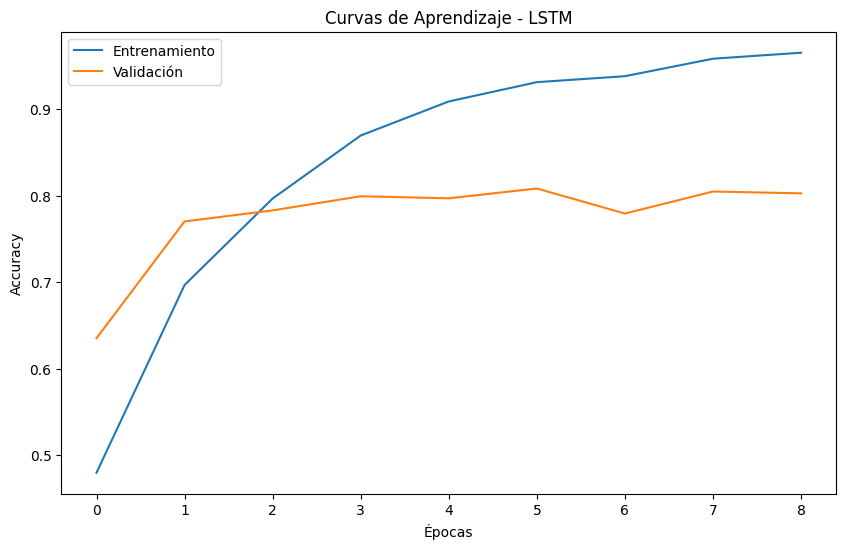

In [ ]:
modelo_1.compile(
    loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

print("Entrenando el modelo")
r_1 = modelo_1.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20, batch_size=32, callbacks=[early_stopping, reduce_lr]
)

# Visualizaci√≥n de resultados del modelo RNN
plt.figure(figsize=(10, 6))
plt.plot(r_1.history['accuracy'], label='Entrenamiento')
plt.plot(r_1.history['val_accuracy'], label='Validaci√≥n')
plt.xlabel('√âpocas')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Curvas de Aprendizaje - LSTM')
plt.show()

In [ ]:
modelo_1.save('modelo_1.h5')

In [ ]:
modelo_1.save('modelo_1.keras')

# Ejercicio extra: Implementaci√≥n de transformer con BETO

Objetivo: Construir y entrenar un modelo BERT para clasificar las noticias.

Acciones:

Utilizar la biblioteca transformers de Hugging Face para cargar el modelo BERT preentrenado.
Ajustar el modelo con el conjunto de datos de entrenamiento.
Evaluar el modelo utilizando un conjunto de datos de validaci√≥n.

## a. Instalaci√≥n de librer√≠as

In [ ]:
!pip install "transformers >= 4.41.2"
!pip install sympy --upgrade
!pip3 install datasets

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.2/6.2 MB 50.5 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu121 requires sympy==1.13.1; python_version >= "3.9", but you have sympy 1.13.3 which is incompatible.
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 480.6/480.6 kB 8.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
from transformers import BertTokenizer
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos
file_path = '/content/nlp_ean/Datos/Datos Crudos/Noticias.xlsx'
data_crudo = pd.read_excel(file_path)

# Eliminar las filas con valores faltantes
data_crudo.dropna(inplace=True)

# Filtrar las categor√≠as relevantes y excluir "archivo"
categorias_relevantes = ['deportes', 'cultura', 'economia', 'justicia']
data = data_crudo[data_crudo['Etiqueta'].isin(categorias_relevantes)]

# Tokenizar los datos
tokenizer = BertTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")
data['input_ids'] = data['contenido'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/364 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/242k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/480k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/648 [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (839 > 512). Running this sequence through the model will result in indexing errors
<ipython-input-49-0113fdc89546>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['input_ids'] = data['contenido'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))


In [ ]:
# Estandarizaci√≥n de longitud de input_ids
max_len = 128
data['input_ids'] = data['input_ids'].apply(lambda x: x[:max_len] + [0]*(max_len-len(x)) if len(x) < max_len else x[:max_len])

## Label encoding para columna Etiqueta

data['Etiqueta'].replace("deportes" , 0, inplace=True)
data['Etiqueta'].replace("cultura" , 1, inplace=True)
data['Etiqueta'].replace("economia" , 2, inplace=True)
data['Etiqueta'].replace("justicia" , 3, inplace=True)

<ipython-input-21-353122695614>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['input_ids'] = data['input_ids'].apply(lambda x: x[:max_len] + [0]*(max_len-len(x)) if len(x) < max_len else x[:max_len])
<ipython-input-21-353122695614>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


 

In [ ]:
# Dividir el conjunto de datos en entrenamiento y validaci√≥n
from sklearn.model_selection import train_test_split
X_train_po, X_val, y_train_po, y_val = train_test_split(data['input_ids'].tolist(), data['Etiqueta'].tolist(), test_size=0.2, random_state=42)

# Balanceo con SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train_po, y_train_po)

# Convertir los datos a tensores
train_encodings = torch.tensor(X_train)
val_encodings = torch.tensor(X_val)
train_labels = torch.tensor(np.reshape(y_train, (-1,1)))
val_labels = torch.tensor(np.reshape(y_val, (-1,1)))

## attention masks

train_masks = torch.tensor([[float(i != 0) for i in ii] for ii in X_train])
val_masks = torch.tensor([[float(i != 0) for i in ii] for ii in X_val])

# Conteo de registros balanceados
from collections import Counter
print(Counter(y_train))

Counter({1: 571, 2: 571, 3: 571, 0: 571})


## b. Implementaci√≥n de BERT

In [ ]:
from transformers import AutoModelForSequenceClassification

# Definir el mapeo de labels
id2label = {0: "deportes", 1: "cultura", 2:"economia", 3:"justicia"}
label2id = {"deportes": 0, "cultura": 1, "economia":2, "justicia":3}

labels = list(id2label.keys())

# Cargar el modelo preentrenado de BETO, versi√≥n en espa√±ol del modelo BERT, en versi√≥n cased para que tenga en cuenta may√∫sculas y min√∫sculas.
# El problem_type es single_label_classification para clasificaci√≥n con una sola etiqueta (tambi√©n conocida como clasificaci√≥n multiclase)
model = AutoModelForSequenceClassification.from_pretrained("dccuchile/bert-base-spanish-wwm-cased",
                                                           num_labels=4,
                                                           problem_type="single_label_classification",
                                                           id2label=id2label,
                                                           label2id=label2id)

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from transformers import EvalPrediction
import torch

# funci√≥n para evaluar m√©tricas de la clasificaci√≥n
def multi_label_metrics(predictions, label, threshold=0.5):
    shape=predictions.shape
    # Utiliza softmax para calcular las probabilidades de cada label
    prob_values = torch.nn.functional.softmax(torch.Tensor(predictions), dim=-1)
    # Genera los arrays para comparar y calcular m√©tricas
    y_pred = np.zeros(shape)
    y_pred[np.where(prob_values >= threshold)] = 1
    y_true = np.zeros(shape)
    y_true[np.arange(len(label)), label.flatten()] = 1

    f1_micro_average = f1_score(y_true=y_true, y_pred=y_pred, average='micro')
    roc_auc = roc_auc_score(y_true, y_pred, average = 'micro')
    accuracy = accuracy_score(y_true, y_pred)
    # retorna un diccionario
    metrics = {'f1': f1_micro_average,
               'roc_auc': roc_auc,
               'accuracy': accuracy}
    return metrics

# M√©tricas de rendimento que ser√°n reportadas durante el proceso de entrenamiento
def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions,
            tuple) else p.predictions
    result = multi_label_metrics(
        predictions=preds,
        label=p.label_ids)
    return result

In [ ]:
from transformers import Trainer, TrainingArguments

batch_size = 8
metric_name = "f1"

# par√°metros para entrenamiento del modelo
args = TrainingArguments(
    output_dir="noticias_model",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=6,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    report_to="none",
    logging_steps = 286,
    label_names=['labels']
    #push_to_hub=True
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# Entrenamiento de Datasets de entrenamiento y validaci√≥n
from datasets import Dataset, DatasetDict

train_dataset = Dataset.from_dict({"input_ids": train_encodings, "attention_mask": train_masks, "labels": train_labels})
val_dataset = Dataset.from_dict({"input_ids": val_encodings, "attention_mask": val_masks, "labels": val_labels})

In [ ]:
from transformers import EarlyStoppingCallback
early_stopping_callback = EarlyStoppingCallback(
    early_stopping_patience=2,  # N√∫mero de √©pocas sin mejora para detener el entrenamiento
    early_stopping_threshold=0.01  # Umbral m√≠nimo de mejora para continuar entrenando
)

In [ ]:
# Entrenamiento del modelo
trainer = Trainer(
    model,
    args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    processing_class=tokenizer,
    callbacks=[early_stopping_callback]
)

trainer.train()

TrainOutput(global_step=1144, training_loss=0.43609617806814766, metrics={'train_runtime': 291.9886, 'train_samples_per_second': 46.933, 'train_steps_per_second': 5.877, 'total_flos': 600956441739264.0, 'train_loss': 0.43609617806814766, 'epoch': 4.0})

In [ ]:
# Guarda el modelo
model_save_dir = '/Resultado'
print(f"[INFO] Saving model to {model_save_dir}")
trainer.save_model(output_dir=model_save_dir)

[INFO] Saving model to /Resultado


In [ ]:
from sklearn.metrics import classification_report

# Evaluar el modelo
results = trainer.evaluate()
print(results)

# Calcular m√©tricas adicionales
predictions = trainer.predict(Dataset.from_dict({"input_ids": val_encodings, "labels": val_labels})).predictions
y_pred_BETO = predictions.argmax(axis=1)

{'eval_loss': 0.24405433237552643, 'eval_f1': 0.9436038514442916, 'eval_roc_auc': 0.9619963369963369, 'eval_accuracy': 0.9423076923076923, 'eval_runtime': 2.5059, 'eval_samples_per_second': 145.258, 'eval_steps_per_second': 18.357, 'epoch': 4.0}


In [ ]:
trainer.state.log_history

[{'loss': 0.6256,
  'grad_norm': 0.5138622522354126,
  'learning_rate': 1.6666666666666667e-05,
  'epoch': 1.0,
  'step': 286},
 {'eval_loss': 0.2681213915348053,
  'eval_f1': 0.9423076923076923,
  'eval_roc_auc': 0.9615384615384616,
  'eval_accuracy': 0.9423076923076923,
  'eval_runtime': 2.598,
  'eval_samples_per_second': 140.105,
  'eval_steps_per_second': 17.706,
  'epoch': 1.0,
  'step': 286},
 {'loss': 0.4639,
  'grad_norm': 6.345340251922607,
  'learning_rate': 1.3333333333333333e-05,
  'epoch': 2.0,
  'step': 572},
 {'eval_loss': 0.24405433237552643,
  'eval_f1': 0.9436038514442916,
  'eval_roc_auc': 0.9619963369963369,
  'eval_accuracy': 0.9423076923076923,
  'eval_runtime': 2.5489,
  'eval_samples_per_second': 142.805,
  'eval_steps_per_second': 18.047,
  'epoch': 2.0,
  'step': 572},
 {'loss': 0.3764,
  'grad_norm': 23.206851959228516,
  'learning_rate': 1e-05,
  'epoch': 3.0,
  'step': 858},
 {'eval_loss': 0.2837802767753601,
  'eval_f1': 0.9353507565337001,
  'eval_roc_au

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       135
           0       0.90      0.95      0.93        79
           2       0.89      0.94      0.91        78
           3       0.95      0.86      0.91        72

    accuracy                           0.94       364
   macro avg       0.94      0.93      0.93       364
weighted avg       0.94      0.94      0.94       364



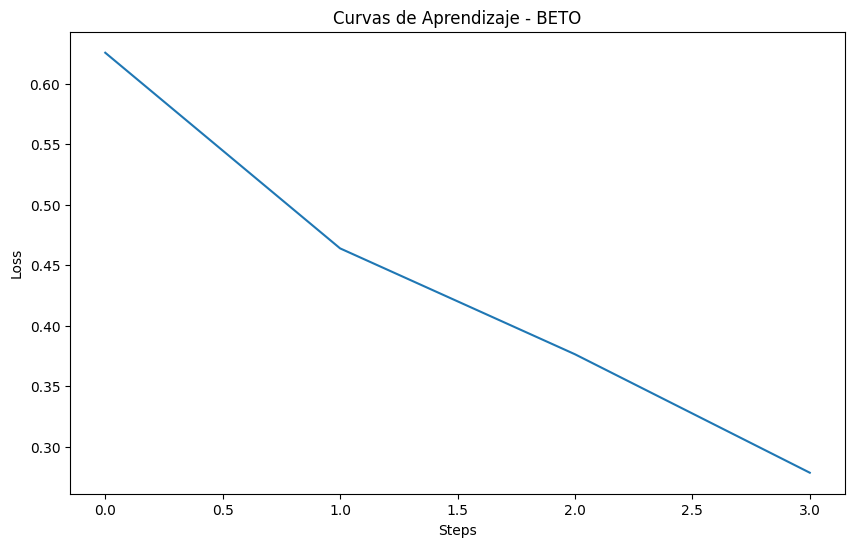

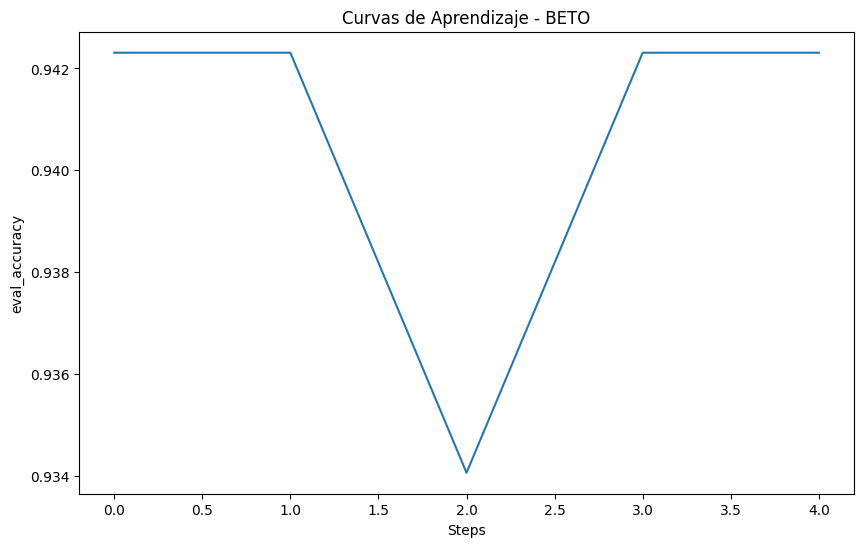

In [ ]:
target_names = [str(name) for name in data['Etiqueta'].unique()]
report_Beto = classification_report(y_val, y_pred_BETO, target_names=target_names)
print(report_Beto);

# Visualizaci√≥n de resultados
import matplotlib.pyplot as plt

loss_values = [d['loss'] for d in trainer.state.log_history if 'loss' in d]
eval_accuracy_values = [d['eval_accuracy'] for d in trainer.state.log_history if 'eval_accuracy' in d]
steps = np.arange(len(loss_values))
eval_accuracy_steps = np.arange(len(eval_accuracy_values))

plt.figure(1, figsize=(10, 6))
plt.plot(steps, loss_values)  # Graficar steps vs. loss values
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Curvas de Aprendizaje - BETO')
plt.show()

plt.figure(2, figsize=(10, 6))
plt.plot(eval_accuracy_steps, eval_accuracy_values)  # Graficar steps vs. eval_accuracy
plt.xlabel('Steps')
plt.ylabel('eval_accuracy')
plt.title('Curvas de Aprendizaje - BETO')
plt.show()

## Ejercicio 7: Comparaci√≥n de Modelos y An√°lisis de Resultados

**Objetivo:** Comparar los modelos RNN y LSTM en t√©rminos de rendimiento y analizar los resultados obtenidos.

**Acciones:**
- Comparar la precisi√≥n y la p√©rdida de los modelos RNN y LSTM en el conjunto de datos de validaci√≥n.
- Calcula otras m√©tricas de evaluaci√≥n como la sensibilidad, la especificidad y el puntaje F1.
- Discutir las fortalezas y debilidades de cada modelo en funci√≥n de los resultados obtenidos.

251/251 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 13ms/step
251/251 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step
RNN Classification Report:
              precision    recall  f1-score   support

    deportes       0.65      0.76      0.70      2650
     cultura       0.71      0.70      0.70      2274
    economia       0.49      0.52      0.50      1669
    justicia       0.50      0.32      0.39      1423

    accuracy                           0.61      8016
   macro avg       0.59      0.57      0.58      8016
weighted avg       0.61      0.61      0.61      8016

LSTM Classification Report:
              precision    recall  f1-score   support

    deportes       0.73      0.87      0.79      2650
     cultura       0.94      0.78      0.85      2274
    economia       0.75      0.78      0.77      1669
    justicia       0.84      0.71      0.77      1423

    accuracy                           0.80      8016
   macro avg       0.

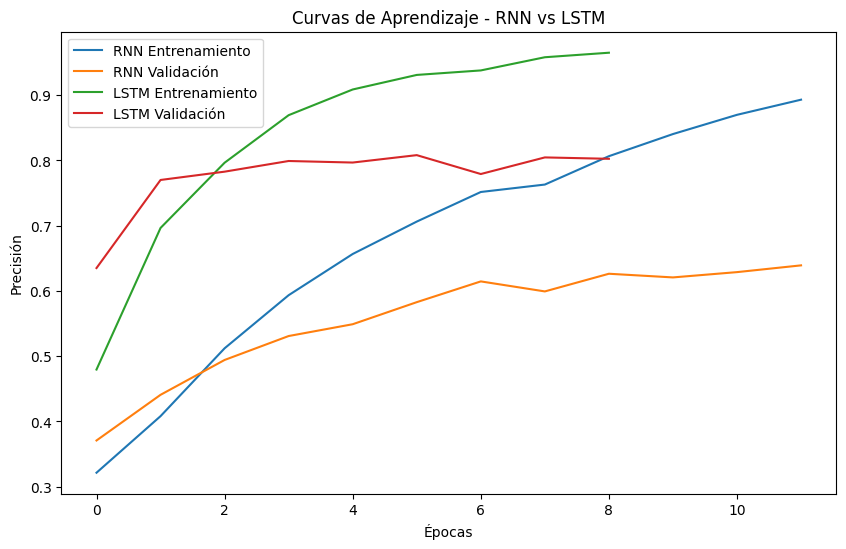

In [ ]:
from sklearn.metrics import classification_report

# Evaluar modelos en el conjunto de validaci√≥n
y_pred_rnn = model_rnn.predict(X_val).argmax(axis=1)
y_pred_lstm = modelo_1.predict(X_val).argmax(axis=1)

# Calcular m√©tricas de rendimiento
report_rnn = classification_report(y_val, y_pred_rnn, target_names=categorias_relevantes)
report_lstm = classification_report(y_val, y_pred_lstm, target_names=categorias_relevantes)

print("RNN Classification Report:")
print(report_rnn)

print("LSTM Classification Report:")
print(report_lstm)

# Visualizaci√≥n de resultados
plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history['accuracy'], label='RNN Entrenamiento')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Validaci√≥n')
plt.plot(r_1.history['accuracy'], label='LSTM Entrenamiento')
plt.plot(r_1.history['val_accuracy'], label='LSTM Validaci√≥n')
plt.xlabel('√âpocas')
plt.ylabel('Precisi√≥n')
plt.legend()
plt.title('Curvas de Aprendizaje - RNN vs LSTM')
plt.show()


251/251 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 12ms/step
251/251 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step


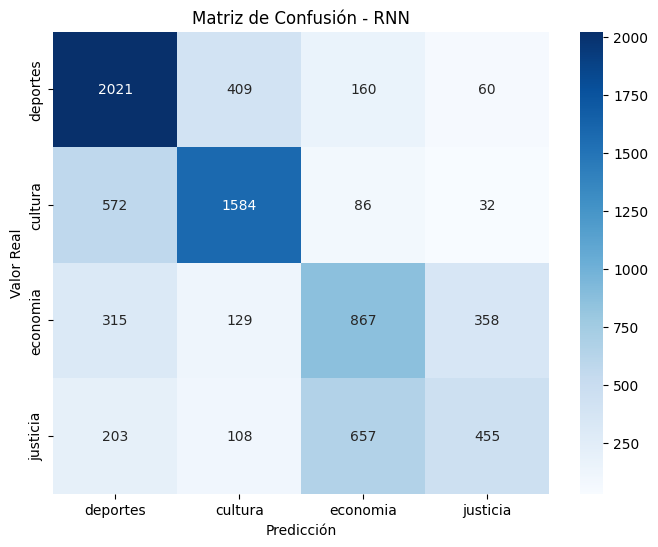

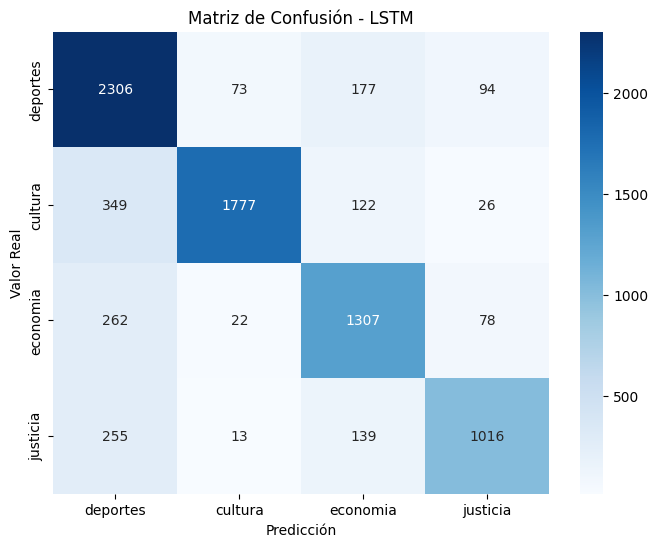

In [ ]:


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluar modelos en el conjunto de validaci√≥n
y_pred_rnn = model_rnn.predict(X_val).argmax(axis=1)
y_pred_lstm = modelo_1.predict(X_val).argmax(axis=1)

# Calcular la matriz de confusi√≥n para el modelo RNN
cm_rnn = confusion_matrix(y_val, y_pred_rnn)

# Visualizar la matriz de confusi√≥n para el modelo RNN
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rnn, annot=True, fmt="d", cmap="Blues",
            xticklabels=categorias_relevantes, yticklabels=categorias_relevantes)
plt.xlabel("Predicci√≥n")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusi√≥n - RNN")
plt.show()

# Calcular la matriz de confusi√≥n para el modelo LSTM
cm_lstm = confusion_matrix(y_val, y_pred_lstm)

# Visualizar la matriz de confusi√≥n para el modelo LSTM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lstm, annot=True, fmt="d", cmap="Blues",
            xticklabels=categorias_relevantes, yticklabels=categorias_relevantes)
plt.xlabel("Predicci√≥n")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusi√≥n - LSTM")
plt.show()


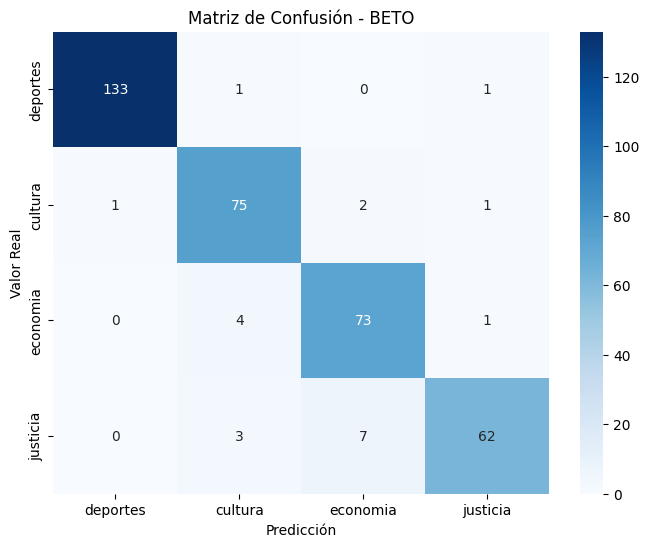

In [ ]:
# Calcular la matriz de confusi√≥n para el modelo BETO
cm_BETO = confusion_matrix(y_val, y_pred_BETO)

# Visualizar la matriz de confusi√≥n para el modelo BETO
plt.figure(figsize=(8, 6))
sns.heatmap(cm_BETO, annot=True, fmt="d", cmap="Blues",
            xticklabels=categorias_relevantes, yticklabels=categorias_relevantes)
plt.xlabel("Predicci√≥n")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusi√≥n - BETO")
plt.show()

## Ejercicio 8: Conclusiones y Recomendaciones

**Objetivo:** Resumir los hallazgos y proporcionar recomendaciones basadas en los resultados obtenidos.

**Acciones:**
- Resumir las principales conclusiones de la comparaci√≥n entre los modelos RNN y LSTM.
- Proporcionar recomendaciones para mejorar el rendimiento de los modelos o explorar enfoques alternativos.
- Discutir las implicaciones pr√°cticas de los resultados y c√≥mo podr√≠an aplicarse en un contexto real.


# **An√°lisis General**
El modelo LSTM supera al RNN en todas las clases, especialmente en t√©rminos de recall (menor cantidad de falsos negativos).
Esto refleja la capacidad de las LSTM para manejar dependencias a largo plazo en datos secuenciales, algo cr√≠tico en tareas de clasificaci√≥n de texto.

BETO tiene un rendimiento sobresaliente en todas las clases, con precisi√≥n y recall significativamente altos, reflejando su capacidad para capturar contextos bidireccionales y comprender mejor el significado de las palabras en su contexto.

# **Rendimiento por Clase**
1. **Deportes**

**RNN:** 2021 verdaderos positivos, 629 falsos negativos, 1090 falsos positivos.

**LSTM:** 2306 verdaderos positivos, 344 falsos negativos, 866 falsos positivos.

**BETO:** 133 verdaderos positivos, 2 falsos negativos, 1 falsos positivos.

**Conclusi√≥n:** LSTM muestra una mejora clara respecto al RNN, reduciendo significativamente los falsos negativos.
BETO casi no presenta errores en esta categor√≠a, evidenciando su capacidad para identificar t√©rminos y patrones √∫nicos en los textos relacionados con deportes.
2. **Cultura**

**RNN:** 1584 verdaderos positivos, 690 falsos negativos, 1090 falsos positivos.

**LSTM:** 1777 verdaderos positivos, 108 falsos negativos, 497 falsos positivos.

**BETO:** 75 verdaderos positivos, 4 falsos negativos, 8 falsos positivos.

**Conclusi√≥n:** LSTM mejora la clasificaci√≥n de esta categor√≠a, especialmente reduciendo los falsos negativos, lo que indica un mejor recall.
BETO, aunque con menos datos absolutos en esta categor√≠a, mantiene un desempe√±o excepcional con pocos errores, lo que lo convierte en la mejor opci√≥n.

3. **Econom√≠a**

**RNN:** 867 verdaderos positivos, 802 falsos negativos, 903 falsos positivos.

**LSTM:** 1307 verdaderos positivos, 438 falsos negativos, 362 falsos positivos.

**BETO:** 73 verdaderos positivos, 5 falsos negativos, 9 falsos positivos.

**Conclusi√≥n:**
LSTM muestra un desempe√±o significativamente mejor que el RNN, logrando reducir tanto los falsos negativos como los falsos positivos.
BETO nuevamente lidera, aunque esta categor√≠a presenta una leve confusi√≥n debido a la relaci√≥n sem√°ntica con otras categor√≠as como justicia o cultura.
4. **Justicia**

**RNN:** 455 verdaderos positivos, 968 falsos negativos, 450 falsos positivos.

**LSTM:** 1016 verdaderos positivos, 407 falsos negativos, 198 falsos positivos.

**BETO:** 62 verdaderos positivos, 10 falsos negativos, 3 falsos positivos.

**Conclusi√≥n:** LSTM supera ampliamente al RNN, mostrando mayor precisi√≥n y recall, lo que lo hace m√°s confiable para esta clase.
BETO, aunque tiene un rendimiento ligeramente inferior en comparaci√≥n con otras clases, sigue mostrando su capacidad para minimizar errores en la clasificaci√≥n.
# **Recomendaciones para Mejorar el Rendimiento**
1. **Optimizaci√≥n de Hiperpar√°metros:**

- Realizar una b√∫squeda m√°s exhaustiva de hiperpar√°metros para los modelos puede ayudar a mejorar su rendimiento.
- Ajustar el tama√±o del lote, el n√∫mero de √©pocas y la tasa de aprendizaje podr√≠a beneficiar el desempe√±o.
- Implementar GridSearch para encontrar los mejores hiperpar√°metros del modelo, en donde se pueden obtener beneficios como: Optimizaci√≥n Exhaustiva, prueba todas las combinaciones posibles de hiperpar√°metros.
Resultados Reproducibles, las pruebas son sistem√°ticas y documentadas y
Mejor Rendimiento, puede identificar configuraciones que maximicen el rendimiento del modelo.
2. **Aumento de Datos:**

- Si es posible, incrementar el tama√±o del conjunto de datos de entrenamiento para mejorar la generalizaci√≥n del modelo.
- Utilizar t√©cnicas de aumento de datos (como la generaci√≥n de sin√≥nimos o el reemplazo de palabras) puede ser √∫til.
3. **Arquitecturas Alternativas:**

- Considerar el uso de modelos m√°s avanzados como Transformer, que han demostrado un rendimiento superior en tareas de NLP, probablemente otros modelos preentrenados tambi√©n en espa√±ol puedan lograr mejoras en el desempe√±o.
- Experimentar con combinaciones de modelos, como un h√≠brido de CNN y RNN, para capturar tanto caracter√≠sticas locales como temporales.
4. **Regularizaci√≥n y Dropout:**

- Implementar t√©cnicas de regularizaci√≥n como el dropout o L2 regularization para reducir el sobreajuste.
- Asegurarse de que los modelos no est√°n memorizando el conjunto de entrenamiento, sino aprendiendo patrones generales.
- Evitar el overfitting con t√©cnicas como Early stopping.

**Modelo Final**: Si los recursos computacionales lo permiten, se recomienda utilizar BETO debido a su precisi√≥n y recall sobresalientes, particularmente en categor√≠as con dependencias contextuales fuertes.

# **Implicaciones Pr√°cticas de los Resultados**
1. **Aplicabilidad en Sistemas Reales:**

- LSTM: Basado en su mejor rendimiento general, el modelo LSTM es m√°s adecuado para aplicaciones en sistemas reales donde la precisi√≥n y el recall son cruciales, como en la clasificaci√≥n de noticias o la moderaci√≥n de contenido.
- RNN: Aunque el rendimiento del RNN es inferior, podr√≠a ser utilizado en aplicaciones donde la precisi√≥n no es tan cr√≠tica o cuando se requiere menor capacidad computacional.
- BERT: Su capacidad para comprender el contexto de palabras en una oraci√≥n lo hace adecuado para aplicaciones como clasificaci√≥n de texto, NER, resumen, traducci√≥n,entre otros.
2. **Impacto en la Experiencia del Usuario:**

- Modelos con mejor precisi√≥n y recall (como el LSTM) proporcionan resultados m√°s fiables, lo que puede mejorar la experiencia del usuario al reducir el n√∫mero de errores de clasificaci√≥n.
- Implementar modelos m√°s precisos puede aumentar la confianza del usuario en el sistema, especialmente en aplicaciones sensibles como la clasificaci√≥n de contenido en plataformas de redes sociales o sistemas de recomendaci√≥n.
3. **Costos Computacionales:**

- Los modelos LSTM, aunque m√°s precisos, suelen ser m√°s costosos en t√©rminos de tiempo y recursos computacionales. Es importante considerar el balance entre la precisi√≥n y los costos operativos al implementar estos modelos en producci√≥n.
- Evaluar el trade-off entre precisi√≥n y eficiencia es crucial para aplicaciones en tiempo real o con recursos limitados.
- Aunque BERT es muy poderoso, su dise√±o y entrenamiento necesitan recursos computacionales significativos, incluso cuando no se entrena desde 0, sino se hace fine-tuning con un modelo preentrenado.

En resumen, en el paradigma de redes neuronales, el modelo LSTM muestra un mejor desempe√±o en general y es recomendable para aplicaciones donde la precisi√≥n es crucial, sin embargo, el paradigma de mecanismos de atenci√≥n ofrece resultados m√°s robustos y sus capacidad de identificar relaciones contextuales complejas le han llevado a abarcar el estandar actual de NLP. No obstante, siempre es importante considerar las limitaciones computacionales y el contexto espec√≠fico de la aplicaci√≥n al elegir el modelo m√°s adecuado.





